In [1]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy
import os
import pandas as pd
import seaborn as sns
sns.set(style='ticks', rc={'axes.grid':True,
                           'xtick.labelsize': 'medium',
                           'ytick.labelsize': 'medium',
#                            'font.size': 15,
                          })
# mpl.rcParams.update({'font.size': 15})
# plt.rc('ytick', labelsize='small') 


# assume the notebook is in the right place and set up the plot path
analysis_dir = _dh[0]
assert analysis_dir.endswith(os.path.join('em-2020','analysis'))
plot_dir = os.path.realpath(os.path.join(analysis_dir, '..', 'tex', 'plots'))
data_dir = os.path.realpath(os.path.join(analysis_dir, '..', 'data'))

In [2]:
SAVE = True

def save_table(table, file, **kwargs):
    if SAVE:
        path = os.path.join(plot_dir, file)
        with open(path, 'w') as fd:
            fd.write(table.to_latex(**kwargs))
        
def save_fig(file, **kwargs):
    if SAVE:
        path = os.path.join(plot_dir, file)
        plt.savefig(path)
        
def load_data(country, version='current'):
    data_file = os.path.join(data_dir, 'WB_{}_{}.csv'.format(country, version))
    data_raw = pd.read_csv(data_file, index_col='year')
    if 'EIb' in data_raw:
        return data_raw[['ISG', 'TO', 'TI', 'P_GDP', 'EI', 'EIb']]
    else:
        return data_raw[['ISG', 'TO', 'TI', 'P_GDP', 'EI']]

In [3]:
REF_COUNTRY = 'BGD'
REF_VERSION = '201805'
ref_data_raw = load_data(REF_COUNTRY, REF_VERSION)
ref_data = ref_data_raw.loc[1986:2015]

In [4]:
pd.options.display.float_format = '{:.2f}'.format
stats = ref_data.describe().T[['min', 'max', 'mean', 'std', 'count']]
stats['count'] = stats['count'].astype(int)
display(stats)
save_table(stats, '_'.join((REF_COUNTRY, REF_VERSION, 'descriptive_statistics.tex')))

,min,max,mean,std,count
ISG,20.05,28.15,24.07,2.28,30
TO,16.69,48.11,30.56,9.98,30
TI,93.00,354.00,239.20,93.50,30
P_GDP,227.42,1210.16,498.83,261.51,30
EI,0.20,0.49,0.35,0.07,29


In [5]:
def plot_corr(data):
    corr = data.corr(lambda x, y: scipy.stats.pearsonr(x,y)[0])
    significance = data.corr(lambda x, y: scipy.stats.pearsonr(x,y)[1])
    corr_text = corr.applymap('{:.3f}'.format) + np.where(significance < .005, '*', '')

    mask = np.triu(np.ones_like(corr, dtype=np.bool))
    f, ax = plt.subplots(figsize=(8, 4))
    cmap = sns.diverging_palette(220, 10, s=50, l=75, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, annot=corr_text, fmt='', mask=mask, cmap=cmap, 
                square=False, linewidths=.25)
    ax.set_yticklabels(ax.get_yticklabels(), fontdict={'verticalalignment': 'center'})

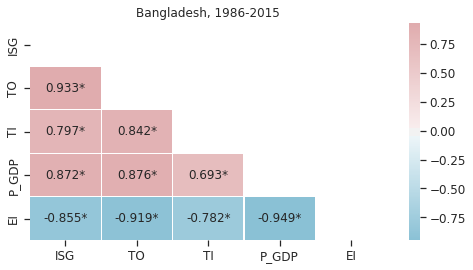

In [6]:
plot_corr(ref_data)
plt.title('Bangladesh, 1986-2015')
save_fig('_'.join((REF_COUNTRY, REF_VERSION, 'correlations.pdf')))

In [7]:
countries = ['BGD', 'IND', 'GBR']
cmp_data = pd.concat([load_data(c, 'current').loc[1986:] for c in countries],
                     keys=countries, names=['country', 'year'])

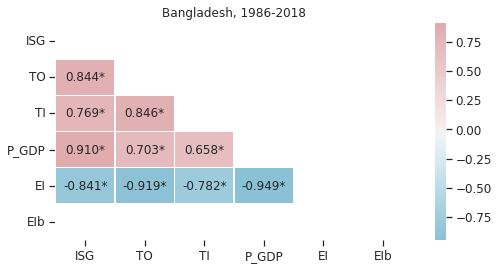

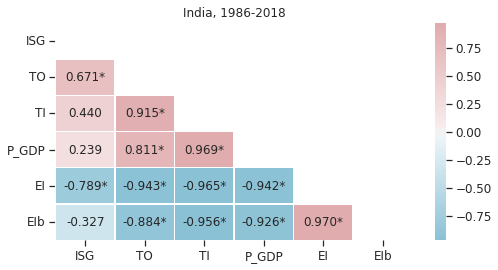

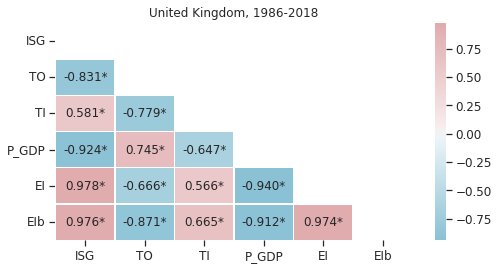

In [8]:
plot_corr(cmp_data.xs('BGD', level='country'))
plt.title('Bangladesh, 1986-2018')
save_fig('_'.join(('BGD', REF_VERSION, 'correlations.pdf')))

plot_corr(cmp_data.xs('IND', level='country'))
plt.title('India, 1986-2018')
save_fig('_'.join(('IND', REF_VERSION, 'correlations.pdf')))

plot_corr(cmp_data.xs('GBR', level='country'))
plt.title('United Kingdom, 1986-2018')
save_fig('_'.join((REF_COUNTRY, REF_VERSION, 'correlations.pdf')))

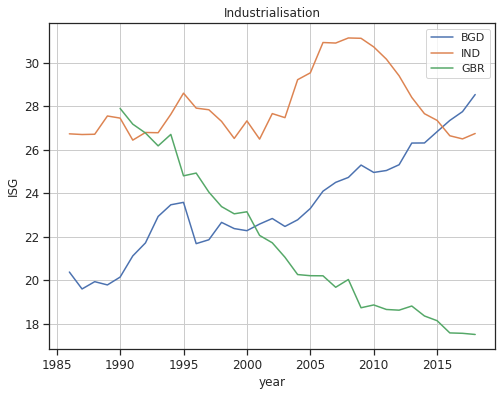

In [9]:
f, ax = plt.subplots(figsize=(8, 6))
cmp_data['ISG'].unstack(level=0).plot(ax=ax)
plt.title('Industrialisation')
plt.ylabel('ISG')
plt.legend(loc='best')
save_fig('ISG_timeseries.pdf')

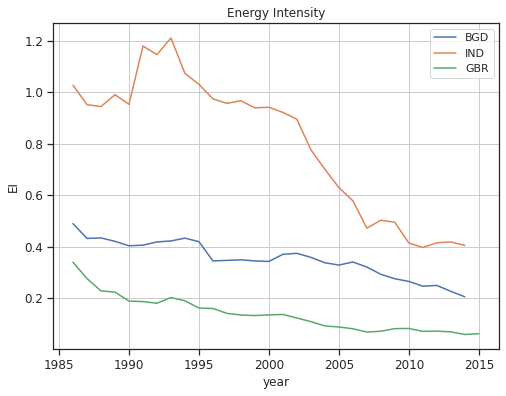

In [10]:
f, ax = plt.subplots(figsize=(8, 6))
cmp_data['EI'].unstack(level=0).plot(ax=ax)
plt.title('Energy Intensity')
plt.ylabel('EI')
plt.legend(loc='best')
save_fig('EI_timeseries.pdf')

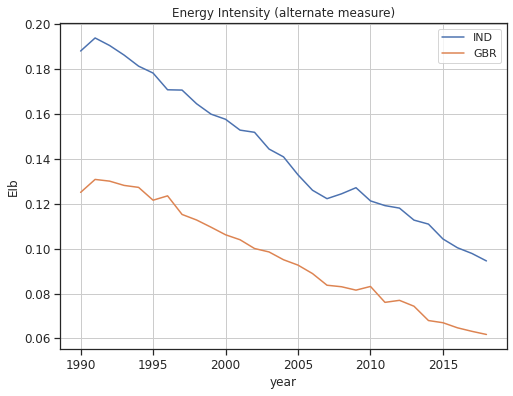

In [11]:
f, ax = plt.subplots(figsize=(8, 6))
cmp_data['EIb'].unstack(level=0)[['IND', 'GBR']].plot(ax=ax)
plt.title('Energy Intensity (alternate measure)')
plt.ylabel('EIb')
plt.legend(loc='best')
save_fig('EIb_timeseries.pdf')

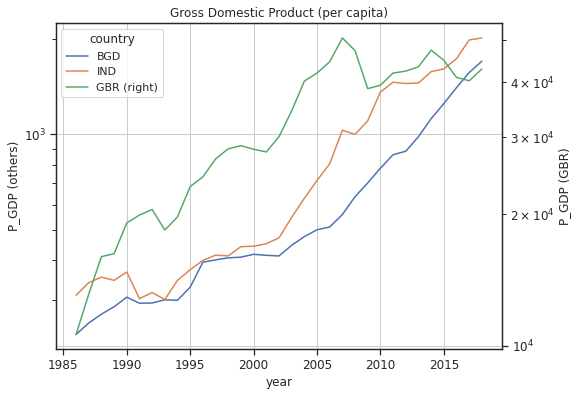

In [12]:
f, ax = plt.subplots(figsize=(8, 6))
cmp_data['P_GDP'].unstack(level=0).plot(ax=ax, logy=True, secondary_y='GBR', grid=True)
plt.title('Gross Domestic Product (per capita)')
plt.ylabel('P_GDP (GBR)')
ax.set_ylabel('P_GDP (others)')
save_fig('P_GDP_timeseries.pdf')

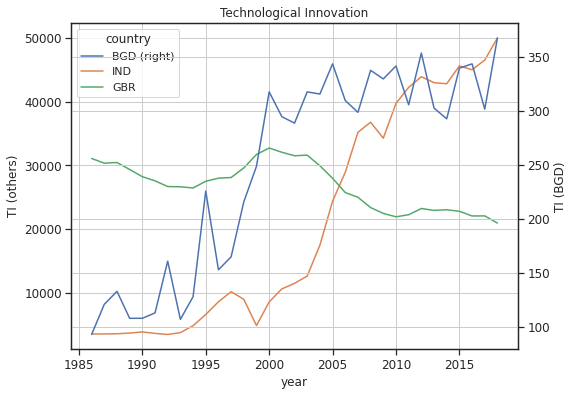

In [13]:
f, ax = plt.subplots(figsize=(8, 6))
cmp_data['TI'].unstack(level=0).plot(ax=ax, secondary_y='BGD', grid=True)
plt.title('Technological Innovation')
plt.ylabel('TI (BGD)')
ax.set_ylabel('TI (others)')
save_fig('TI_timeseries.pdf')

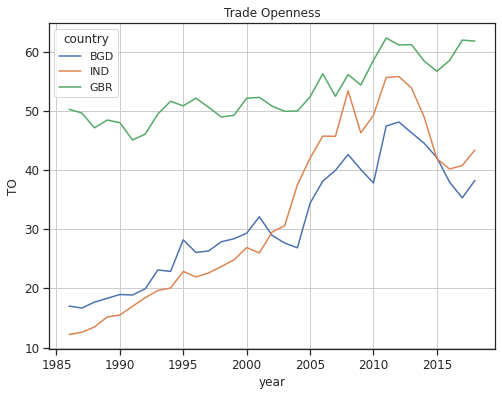

In [14]:
f, ax = plt.subplots(figsize=(8, 6))
cmp_data['TO'].unstack(level=0).plot(ax=ax, grid=True)
plt.title('Trade Openness')
plt.ylabel('TO')
save_fig('TO_timeseries.pdf')